In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv')
df = df[['Type', 'Days for shipment (scheduled)', 'Days for shipping (real)', \
         'Sales per customer', 'Delivery Status', 'Late_delivery_risk', \
        'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', \
        'Customer State', 'Department Name', 'Latitude', 'Longitude', 'Market', \
         'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Discount', \
         'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', \
        'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', \
        'Order Region', 'Order State', 'Order Status', 'Product Name', 'Product Price', \
        'Shipping Mode', "Customer Id", "Order Id"]]
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [18]:
df.head()

,Type,Days for shipment (scheduled),Days for shipping (real),Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,Customer Id,Order Id,Total orders
0,DEBIT,4,3,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,20755,77202,1
1,TRANSFER,4,5,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,...,-249.089996,South Asia,Rajast�n,PENDING,Smart watch,327.75,Standard Class,19492,75939,1
2,CASH,4,4,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,...,-247.779999,South Asia,Rajast�n,CLOSED,Smart watch,327.75,Standard Class,19491,75938,1
3,DEBIT,4,3,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,...,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,19490,75937,1
4,PAYMENT,4,2,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,19489,75936,1


In [3]:
df.describe()

,Days for shipment (scheduled),Days for shipping (real),Sales per customer,Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Customer Id,Order Id
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,2.931847,3.497654,183.107609,0.548291,29.719955,-84.915675,20.664741,0.101668,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,141.232550,6691.379495,36221.894903
std,1.374449,1.623722,120.043670,0.497664,9.813646,21.433241,21.800901,0.070415,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,139.732492,4162.918106,21045.379569
min,0.000000,0.000000,7.490000,0.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000,1.000000,1.000000
25%,2.000000,2.000000,104.379997,0.000000,18.265432,-98.446312,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,50.000000,3258.500000,18057.000000
50%,4.000000,3.000000,163.990005,1.000000,33.144863,-76.847908,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59.990002,6457.000000,36140.000000
75%,4.000000,5.000000,247.399994,1.000000,39.279617,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,199.990005,9779.000000,54144.000000
max,4.000000,6.000000,1939.989990,1.000000,48.781933,115.263077,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1999.989990,20757.000000,77204.000000


In [4]:
counts = df.groupby("Customer Id").count()
counts['Total orders'] = counts['Type']
df = df.join(counts['Total orders'], how='left', on='Customer Id')

<AxesSubplot:>

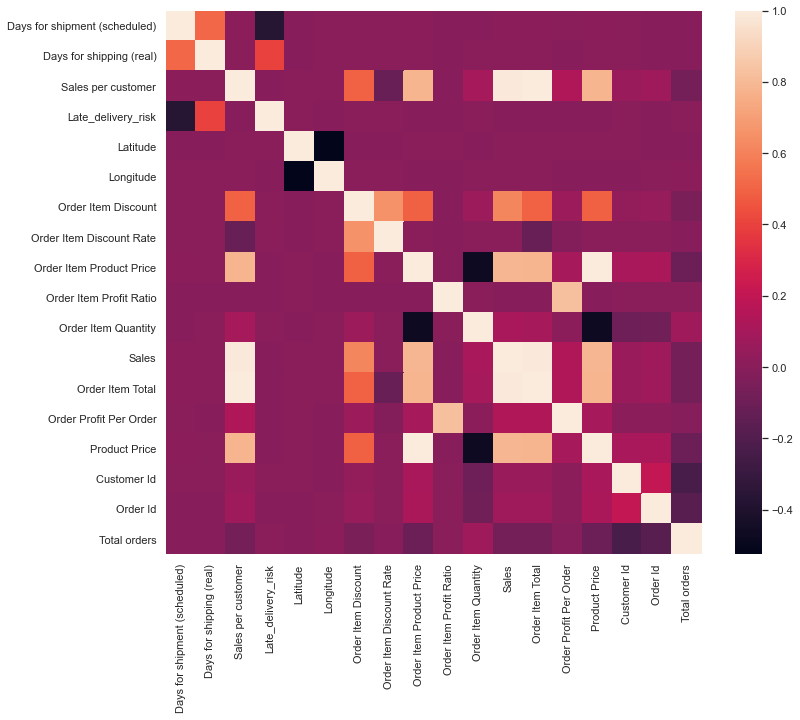

In [5]:
# sales per customer and product price, order item discount and sales, order item product price and sales 
corr = df.corr() 
sns.set(rc={'figure.figsize':(12, 10)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

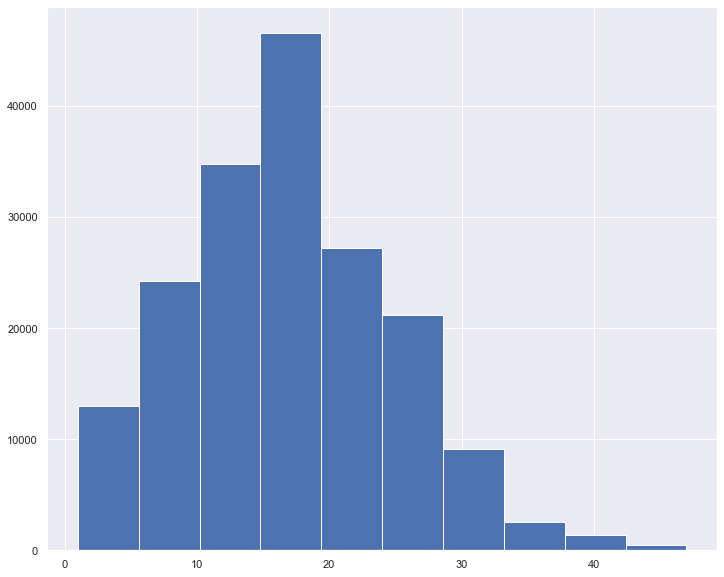

In [6]:
plt.hist(df['Total orders'])
plt.show()

In [7]:
df['Total orders'].describe()

count    180519.000000
mean         16.766651
std           7.922448
min           1.000000
25%          11.000000
50%          16.000000
75%          22.000000
max          47.000000
Name: Total orders, dtype: float64

<AxesSubplot:>

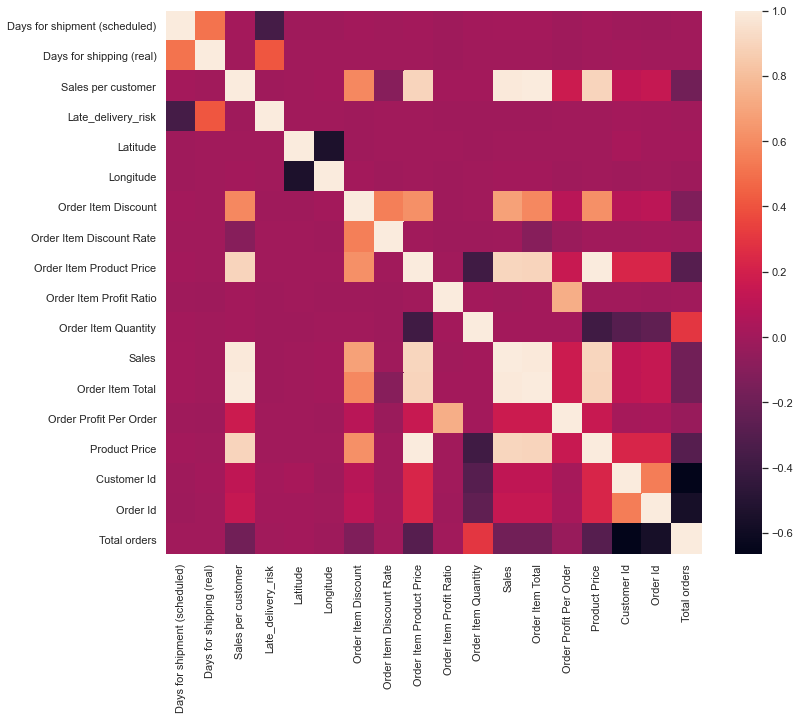

In [8]:
# Get bottom quartile of orders 
corr = df[df['Total orders'] < 11].corr() 
sns.set(rc={'figure.figsize':(12, 10)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# medium strength correlation between 

In [21]:
df_lt_2018 = df[df['order date (DateOrders)'].dt.year < 2018]

In [22]:
df_lt_2018['Month'] = df_lt_2018['order date (DateOrders)'].dt.month
df_lt_2018['Year'] = df_lt_2018['order date (DateOrders)'].dt.year

<ipython-input-22-f327e5e4c60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lt_2018['Month'] = df_lt_2018['order date (DateOrders)'].dt.month
<ipython-input-22-f327e5e4c60b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lt_2018['Year'] = df_lt_2018['order date (DateOrders)'].dt.year


In [52]:
df_lt_groupby = df_lt_2018.groupby(["Year", "Month", "Customer Segment"]).count()

In [53]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(df_lt_groupby['Type'])

Year  Month  Customer Segment
2015  1      Consumer            2763
             Corporate           1613
             Home Office          946
      2      Consumer            2418
             Corporate           1403
             Home Office          908
      3      Consumer            2795
             Corporate           1628
             Home Office          939
      4      Consumer            2728
             Corporate           1487
             Home Office          911
      5      Consumer            2723
             Corporate           1682
             Home Office          952
      6      Consumer            2670
             Corporate           1559
             Home Office          905
      7      Consumer            2688
             Corporate           1668
             Home Office          943
      8      Consumer            2709
             Corporate           1651
             Home Office          913
      9      Consumer            2709
             Corpora

In [54]:
df_lt_groupby = df_lt_groupby['Type']

In [59]:
df_lt_groupby = df_lt_groupby.reset_index()

In [67]:
df_lt_groupby

,Year,Month,Customer Segment,Type
0,2015,1,Consumer,2763
1,2015,1,Corporate,1613
2,2015,1,Home Office,946
3,2015,2,Consumer,2418
4,2015,2,Corporate,1403
...,...,...,...,...
103,2017,11,Corporate,669
104,2017,11,Home Office,343
105,2017,12,Consumer,1143
106,2017,12,Corporate,614


In [77]:
df_lt_groupby2 = df_lt_groupby.groupby(["Year", "Month"]).sum().reset_index()

In [80]:
#df_lt_groupby.join(df_lt_groupby2,on=['Year','Month'])
#Get % of each product category for every year-month collection and then plot stacked bar plot to see trends of the product

ValueError: len(left_on) must equal the number of levels in the index of "right"

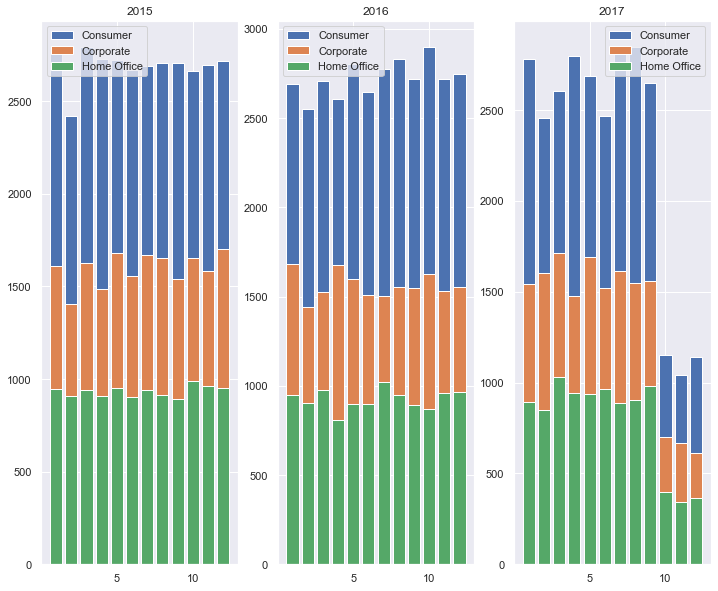

In [63]:
i = 1
for year in range(2015, 2018):
    subset = df_lt_groupby[df_lt_groupby['Year'] == year] 
    plt.subplot(1,3,i)
    for category in subset['Customer Segment'].unique():
        plt.bar(subset[subset['Customer Segment'] == category]['Month'], subset[subset['Customer Segment'] == category]['Type'],
                 label=category)
        plt.legend()
    plt.title(str(year))
    i += 1

In [ ]:
plt.bar(df_lt_groupby['Month'],df_lt_groupby['Type'])
plt.bar(df_lt_group)

In [55]:
asd = df_lt_groupby[df_lt_groupby['Year'] == 2015] 
asd.drop('Year',axis = 1,inplace=True)
asd.plot(x='Month', kind='bar',stacked=True)

KeyError: 'Year'

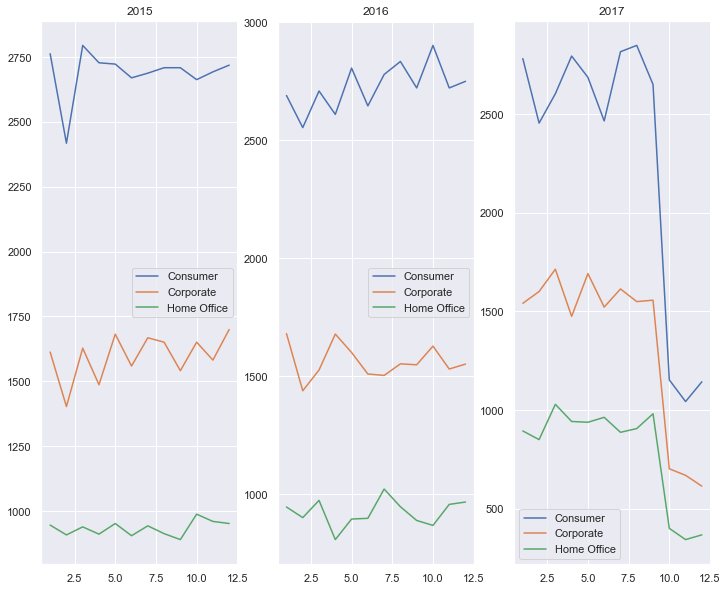

In [81]:
i = 1
for year in range(2015, 2018):
    subset = df_lt_groupby[df_lt_groupby['Year'] == year] 
    plt.subplot(1,3,i)
    for category in subset['Customer Segment'].unique():
        plt.plot(subset[subset['Customer Segment'] == category]['Month'], subset[subset['Customer Segment'] == category]['Type'],
                 label=category)
        plt.legend()
    plt.title(str(year))
    i += 1